In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Leitura dos dados


In [19]:
# Importando a base de dados
# Uma arquivo texto ('.txt') pode ser lido utilizando comando do read_txt dentro do Pandas
consumo = pd.read_table("Consumo_Alimentos.txt", sep='\t', decimal=".")
consumo.head()

,Pais,carne_vermelha,carne_branca,ovos,leite,peixes,cereais,carboidratos,graos,fruta_vegetais
0,Albania,10,1,0.5,8.9,0.2,42.3,0.6,6,2
1,Austria,9,14,4.3,19.9,2.1,28.0,3.6,1,4
2,Belgium,14,9,4.1,17.5,4.5,27.0,5.7,2,4
3,Bulgaria,8,6,1.6,8.3,1.2,57.0,1.1,4,4
4,Czechoslovakia,10,11,2.8,12.5,2.0,34.0,5.0,1,4


## Análise Exploratória

In [3]:
consumo.dtypes

Pais                object
carne_vermelha       int64
 carne_branca        int64
 ovos              float64
 leite             float64
 peixes            float64
 cereais           float64
 carboidratos      float64
 graos               int64
 fruta_vegetais      int64
dtype: object

In [4]:
consumo.shape

(25, 10)

In [5]:
consumo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carne_vermelha,25.0,9.800,3.403430,4.0,8.0,10.0,11.0,18.0
carne_branca,25.0,7.920,3.740766,1.0,5.0,8.0,11.0,14.0
ovos,25.0,2.936,1.117617,0.5,2.7,2.9,3.7,4.7
leite,25.0,17.112,7.105416,4.9,11.1,17.6,23.3,33.7
peixes,25.0,4.284,3.402533,0.2,2.1,3.4,5.8,14.2
cereais,25.0,32.332,11.021446,19.0,24.0,28.0,40.0,57.0
carboidratos,25.0,4.276,1.634085,0.6,3.1,4.7,5.7,6.5
graos,25.0,3.080,2.019076,1.0,2.0,2.0,5.0,8.0
fruta_vegetais,25.0,4.200,1.914854,1.0,3.0,4.0,5.0,8.0


In [6]:
consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pais             25 non-null     object 
 1   carne_vermelha   25 non-null     int64  
 2    carne_branca    25 non-null     int64  
 3    ovos            25 non-null     float64
 4    leite           25 non-null     float64
 5    peixes          25 non-null     float64
 6    cereais         25 non-null     float64
 7    carboidratos    25 non-null     float64
 8    graos           25 non-null     int64  
 9    fruta_vegetais  25 non-null     int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# Quartil: para variável carne vermelha
Q1 = np.quantile(consumo['carne_vermelha'], 0.25)
Q3 = np.quantile(consumo['carne_vermelha'], 0.75)
# Intervalo Interquartil: para variável carne vermelha
intervalo_IQ = Q3 - Q1

[round(Q1,2), round(Q3,2), round(intervalo_IQ,2)]

[8.0, 11.0, 3.0]

In [8]:
#Coeficiente de Variação: para variável carne vermelha
# Apresenta quanto o desvio padrão está dif em relação a média
cv_carne_vermelha = consumo['carne_vermelha'].std()/consumo['carne_vermelha'].mean()
round(cv_carne_vermelha,2)

0.35

## BoxPlot univariado

In [9]:
# Empilha as variáveis uma embaixo da outro, construindo uma tabela com 2 colunas: variávele valor
tabela_boxplot = pd.melt(consumo.drop(['Pais'], axis=1))
tabela_boxplot

,variable,value
0,carne_vermelha,10.0
1,carne_vermelha,9.0
2,carne_vermelha,14.0
3,carne_vermelha,8.0
4,carne_vermelha,10.0
...,...,...
220,fruta_vegetais,5.0
221,fruta_vegetais,3.0
222,fruta_vegetais,3.0
223,fruta_vegetais,4.0


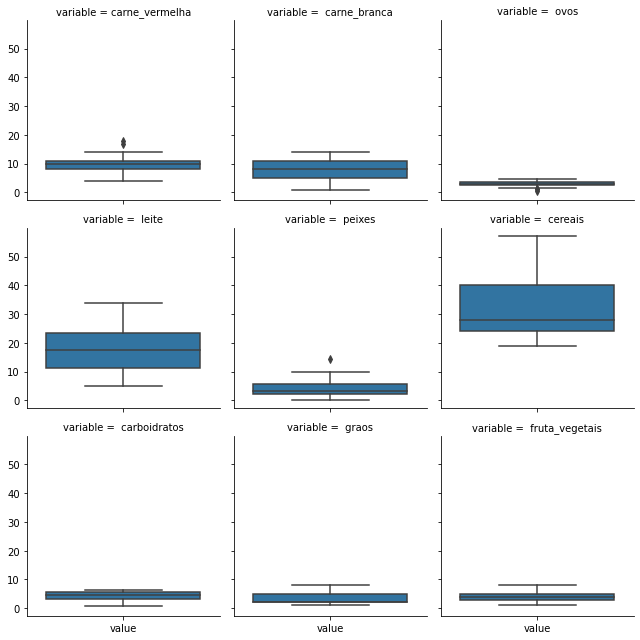

In [10]:
# Utiliza da tabela_boxplot separando por variável, com 3 colunas 
aux_boxplot = sns.FacetGrid(tabela_boxplot, col="variable", col_wrap=3)
# Constrói o boxplot
aux_boxplot.map_dataframe(sns.boxplot)

## Análise de Agrupamento: Método Hierárquico

In [25]:
# Definindo o índice da base de dados
consumo = consumo.set_index('Pais')

In [26]:
# Importa as funções dendrograma e ligação (linkage) do Spcipy
from scipy.cluster.hierarchy import dendrogram, linkage

labelList = consumo.index

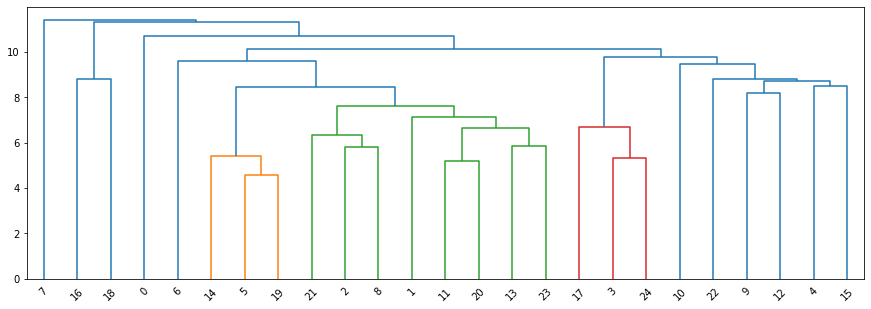

In [28]:
# Método Single
metodo_single = linkage(consumo, 'single')
plt.figure(figsize=(15, 5))
dendrogram(metodo_single)
plt.show()

### Exercício
De acordo com a célula anterior, construa o dendrograma para o método Complete

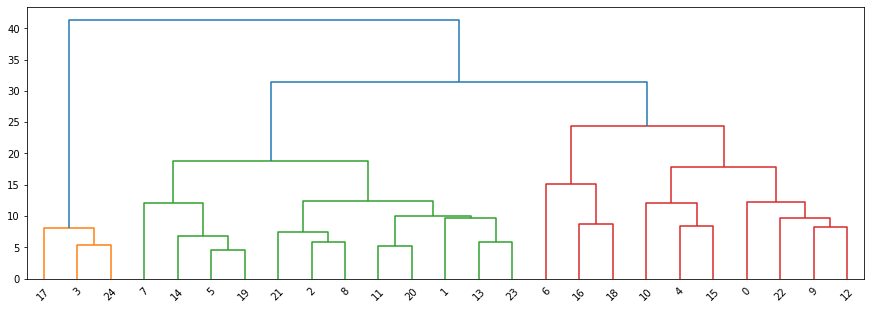

In [29]:
# Método Complete
# Método Single
metodo_complete = linkage(consumo, 'complete')
plt.figure(figsize=(15, 5))
dendrogram(metodo_complete)
plt.show()

## Descritiva dos grupos 

Analisar as características de cada grupo (20:45)

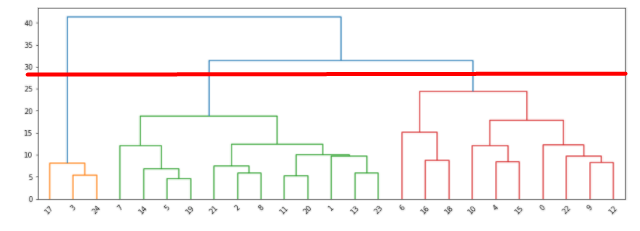

In [33]:
from scipy.cluster.hierarchy import fcluster
# Na altura do corte, é selecionado a quantidade de grupos 
# (apartir da altura observada)
corte = 27
cluster = fcluster(metodo_complete, corte, criterion='distance')

In [32]:
# Criando uma nova variável na base de dados consumo: cluster
consumo['cluster'] = cluster
consumo.head(5)

,carne_vermelha,carne_branca,ovos,leite,peixes,cereais,carboidratos,graos,fruta_vegetais,cluster
Pais,,,,,,,,,,
Albania,10,1,0.5,8.9,0.2,42.3,0.6,6,2,3
Austria,9,14,4.3,19.9,2.1,28.0,3.6,1,4,2
Belgium,14,9,4.1,17.5,4.5,27.0,5.7,2,4,2
Bulgaria,8,6,1.6,8.3,1.2,57.0,1.1,4,4,1
Czechoslovakia,10,11,2.8,12.5,2.0,34.0,5.0,1,4,3


In [34]:
# Empilhando a base de dados em 3 colunas: cluster, variável e indicador de consumo alimentar
tabela_cluster = pd.melt(consumo, id_vars='cluster')
tabela_cluster

,cluster,variable,value
0,3,carne_vermelha,10.0
1,2,carne_vermelha,9.0
2,2,carne_vermelha,14.0
3,1,carne_vermelha,8.0
4,3,carne_vermelha,10.0
...,...,...,...
220,2,fruta_vegetais,5.0
221,2,fruta_vegetais,3.0
222,3,fruta_vegetais,3.0
223,2,fruta_vegetais,4.0


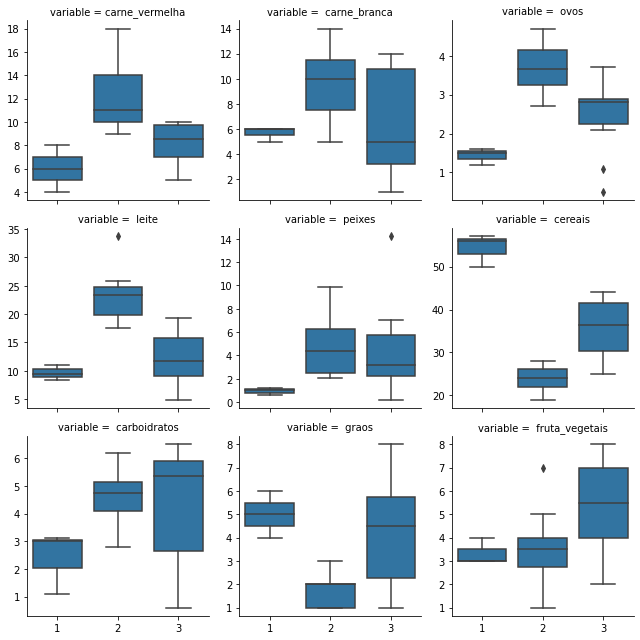

In [44]:
# Construindo Boxplots por cluster para cada tipo de variável
# sharey=False (Escala livre)
g = sns.FacetGrid(tabela_cluster, col="variable", sharey=False, col_wrap=3)
g.map_dataframe(sns.boxplot, x="cluster", y="value")

## Padronização das variáveis pelo Z-Score

Refazendo os itens anteriores com as variáveis padronizadas

In [36]:
#Leitura da base de dados
consumo = pd.read_table("Consumo_Alimentos.txt", sep='\t', decimal=".")

# Considerar coluna País como índice
consumo = consumo.set_index('Pais')

In [37]:
# Utilizando a função prepocessing do Scikit-learn
from sklearn import preprocessing

In [46]:
# Função "preprocessing.StandardScaler().fit(consumo)"
# transforma as variáveis originais de "consumo" no Z-score
#
# Empilha as variáveis uma embaixo da outra, 
# construindo uma tabela com 2 colunas: variávele valor
consumo_z = preprocessing.StandardScaler().fit(consumo).transform(consumo)

# Transforma em Data Frame
consumo_z_df = pd.DataFrame(consumo_z, index=consumo.index, columns=consumo.columns)
consumo_z_df.head()

,carne_vermelha,carne_branca,ovos,leite,peixes,cereais,carboidratos,graos,fruta_vegetais
Pais,,,,,,,,,
Albania,0.059976,-1.888034,-2.224584,-1.179570,-1.225033,0.923068,-2.295965,1.476028,-1.172604
Austria,-0.239904,1.658851,1.245621,0.400468,-0.655111,-0.401157,-0.422218,-1.051417,-0.106600
Belgium,1.259496,0.294664,1.062979,0.055732,0.064791,-0.493760,0.889405,-0.545928,-0.106600
Bulgaria,-0.539784,-0.523848,-1.220051,-1.265754,-0.925074,2.284335,-1.983674,0.465050,-0.106600
Czechoslovakia,0.059976,0.840339,-0.124197,-0.662467,-0.685107,0.154462,0.452198,-1.051417,-0.106600


In [39]:
# Mostra as medidas resumo: resultado da tranformação é ~ média zero e ~ variância um
consumo_z_df.describe().transpose()

#Media 0 e Variancia 1

,count,mean,std,min,25%,50%,75%,max
carne_vermelha,25.0,-2.664535e-16,1.020621,-1.739304,-0.539784,0.059976,0.359856,2.459017
carne_branca,25.0,-1.776357e-17,1.020621,-1.888034,-0.796685,0.021827,0.840339,1.658851
ovos,25.0,4.440892e-16,1.020621,-2.224584,-0.215518,-0.032876,0.697694,1.610906
leite,25.0,-2.220446e-16,1.020621,-1.754130,-0.863563,0.070096,0.888843,2.382698
peixes,25.0,2.664535e-17,1.020621,-1.225033,-0.655111,-0.265164,0.454738,2.974394
cereais,25.0,-7.105427e-17,1.020621,-1.234585,-0.771570,-0.401157,0.710081,2.284335
carboidratos,25.0,1.509903e-16,1.020621,-2.295965,-0.734509,0.264823,0.889405,1.389071
graos,25.0,-3.552714e-17,1.020621,-1.051417,-0.545928,-0.545928,0.970539,2.487006
fruta_vegetais,25.0,-8.437695e-17,1.020621,-1.705606,-0.639602,-0.106600,0.426401,2.025407


### Exercício

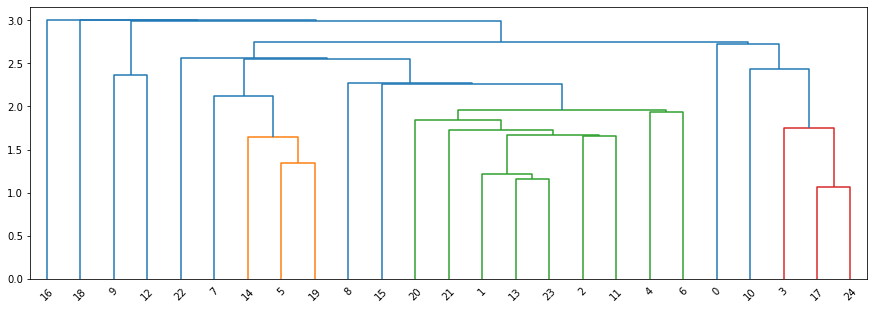

In [40]:
# Método Single
metodo_single = linkage(consumo_z_df, 'single')
plt.figure(figsize=(15, 5))
dendrogram(metodo_single)
plt.show()

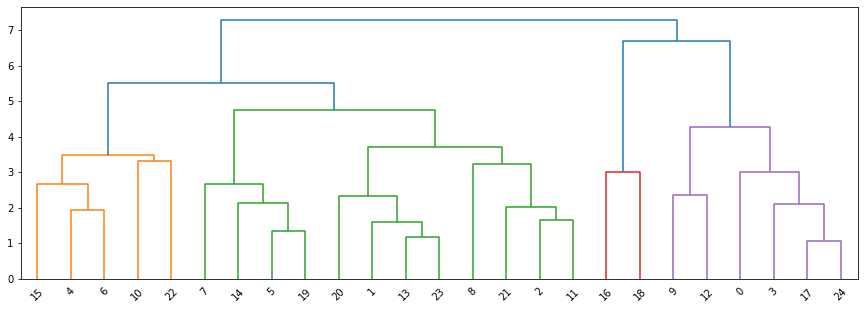

In [53]:
# Método Complete
metodo_complete = linkage(consumo_z_df, 'complete')
plt.figure(figsize=(15, 5))
dendrogram(metodo_complete)
plt.show()

In [49]:
# from scipy.cluster.hierarchy import fcluster
# Na altura do corte, é selecionado a quantidade de grupos 
# (apartir da altura observada)
corte = 5
cluster = fcluster(metodo_complete, corte, criterion='distance')

In [54]:
# Salvando os grupos na base de dados: cluster_z (na base original)
# BASE ORIGINAL SEMPRE - DEPOIS DA PADRONIZACAO
consumo['cluster'] = cluster
consumo.head(5)

,carne_vermelha,carne_branca,ovos,leite,peixes,cereais,carboidratos,graos,fruta_vegetais,cluster
Pais,,,,,,,,,,
Albania,10,1,0.5,8.9,0.2,42.3,0.6,6,2,4
Austria,9,14,4.3,19.9,2.1,28.0,3.6,1,4,2
Belgium,14,9,4.1,17.5,4.5,27.0,5.7,2,4,2
Bulgaria,8,6,1.6,8.3,1.2,57.0,1.1,4,4,4
Czechoslovakia,10,11,2.8,12.5,2.0,34.0,5.0,1,4,1


In [55]:
# Empilhando a base de dados em 3 colunas: cluster, variável original e indicador de consumo alimentar
tabela_cluster = pd.melt(consumo, id_vars='cluster')
tabela_cluster

,cluster,variable,value
0,4,carne_vermelha,10.0
1,2,carne_vermelha,9.0
2,2,carne_vermelha,14.0
3,4,carne_vermelha,8.0
4,1,carne_vermelha,10.0
...,...,...,...
220,2,fruta_vegetais,5.0
221,2,fruta_vegetais,3.0
222,1,fruta_vegetais,3.0
223,2,fruta_vegetais,4.0


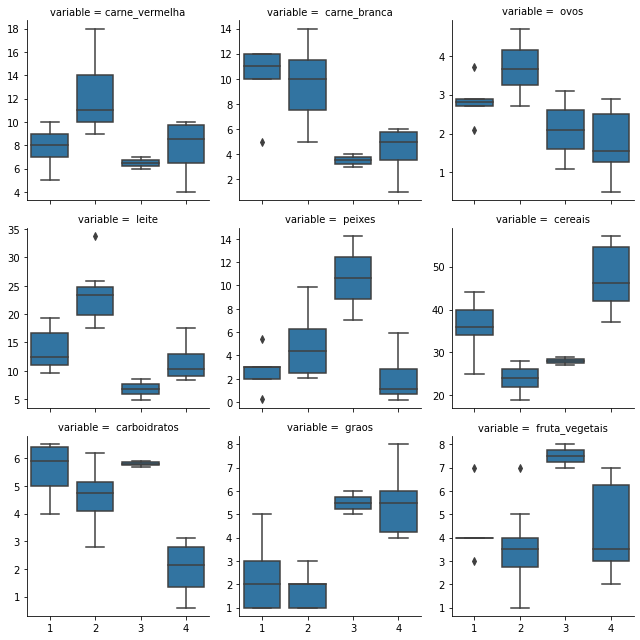

In [56]:
# Construindo Boxplots por cluster para cada tipo de variável
g = sns.FacetGrid(tabela_cluster, col="variable", sharey=False, col_wrap=3)
g.map_dataframe(sns.boxplot, x="cluster", y="value")

## Método k-médias

In [57]:
#Leitura da base de dados
consumo = pd.read_table("Consumo_Alimentos.txt", sep='\t', decimal=".")

In [58]:
# Considerar coluna País como índice
consumo = consumo.set_index('Pais')

### Padronização

In [59]:
# Utilizando a função prepocessing do Scikit-learn
from sklearn import preprocessing

# Função "preprocessing.StandardScaler().fit(consumo)" transforma as variáveis originais de "consumo" no Z-score
# Empilha as variáveis uma embaixo da outro, construindo uma tabela com 2 colunas: variávele valor

consumo_z = preprocessing.StandardScaler().fit(consumo).transform(consumo)
# Transforma em Data Frame
consumo_z_df = pd.DataFrame(consumo_z, index=consumo.index, columns=consumo.columns)

In [ ]:
#round(consumo_z_df.describe().transpose(),2)

In [60]:
# Importa do Scikit-learn o K-médias
from sklearn.cluster import KMeans

In [61]:
# Definição do número de centróides = k
# random_state = semente
kmeans = KMeans(n_clusters=4,random_state=321)

In [62]:
# Roda o método k-médias com a base padronizadas
kmeans.fit(consumo_z_df)

KMeans(n_clusters=4, random_state=321)

In [68]:
# Mostra as k centróides, se k=4, teremos as posições de 0-3 para checar as centroides
# Caractersticas médias do cluster ( valor do centróide )
kmeans.cluster_centers_[3]
#kmeans.cluster_centers_[1]

array([ 0.05997601, -0.18280101,  0.19542735,  1.37362771,  1.18213867,
       -0.8873235 ,  0.17113559, -0.92504503, -1.17260394])

In [64]:
# Mostra para cada país (índice da base), a qual cluster foi alocado
kmeans.labels_

array([0, 2, 2, 0, 2, 1, 2, 1, 2, 3, 0, 2, 3, 2, 1, 2, 3, 0, 3, 1, 2, 2,
       0, 2, 0])

In [65]:
# Atribui na base de dados os clustes
consumo['clusterk_z'] = kmeans.labels_
consumo['clusterk_z'].value_counts()

2    11
0     6
3     4
1     4
Name: clusterk_z, dtype: int64

In [66]:
# Empilha as variáveis uma embaixo da outro, construindo uma tabela com 2 colunas: variávele valor
tabela_clusterk_z = pd.melt(consumo, id_vars='clusterk_z')
tabela_clusterk_z

,clusterk_z,variable,value
0,0,carne_vermelha,10.0
1,2,carne_vermelha,9.0
2,2,carne_vermelha,14.0
3,0,carne_vermelha,8.0
4,2,carne_vermelha,10.0
...,...,...,...
220,2,fruta_vegetais,5.0
221,2,fruta_vegetais,3.0
222,0,fruta_vegetais,3.0
223,2,fruta_vegetais,4.0


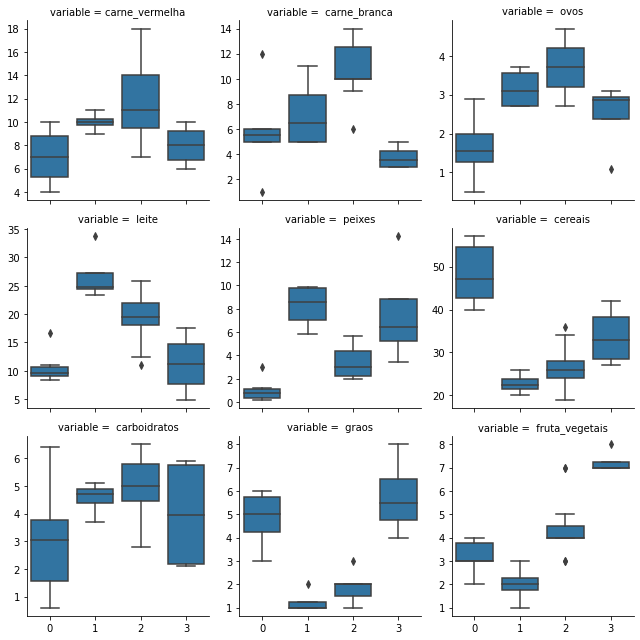

In [67]:
g = sns.FacetGrid(tabela_clusterk_z, col="variable", sharey=False, col_wrap=3)
g.map_dataframe(sns.boxplot, x="clusterk_z", y="value")

## Realize novamente a Análise Cluster, considerando agora k=3

In [70]:
# Definição do número de centróides = k
kmeans = KMeans(n_clusters=3)

In [71]:
# Roda o método k-médias com a base padronizadas
kmeans.fit(consumo_z_df)

KMeans(n_clusters=3)

In [73]:
# Mostra as k centróides, se k=4, teremos as posições de 0-3 para checar as centroides
# Caractersticas médias do cluster ( valor do centróide )
kmeans.cluster_centers_[2]
#kmeans.cluster_centers_[1]

array([-0.98960424, -1.20594101, -0.76344517, -1.48839594,  1.89454145,
       -0.4011569 ,  0.95186365,  1.22328359,  1.75890591])

In [74]:
# Mostra para cada país (índice da base), a qual cluster foi alocado
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 1, 0])

In [75]:
# Atribui na base de dados os clustes
consumo['clusterk_z'] = kmeans.labels_
consumo['clusterk_z'].value_counts()

1    15
0     8
2     2
Name: clusterk_z, dtype: int64

In [76]:
# Empilha as variáveis uma embaixo da outro, construindo uma tabela com 2 colunas: variávele valor
tabela_clusterk_z = pd.melt(consumo, id_vars='clusterk_z')
tabela_clusterk_z

,clusterk_z,variable,value
0,0,carne_vermelha,10.0
1,1,carne_vermelha,9.0
2,1,carne_vermelha,14.0
3,0,carne_vermelha,8.0
4,1,carne_vermelha,10.0
...,...,...,...
220,1,fruta_vegetais,5.0
221,1,fruta_vegetais,3.0
222,0,fruta_vegetais,3.0
223,1,fruta_vegetais,4.0


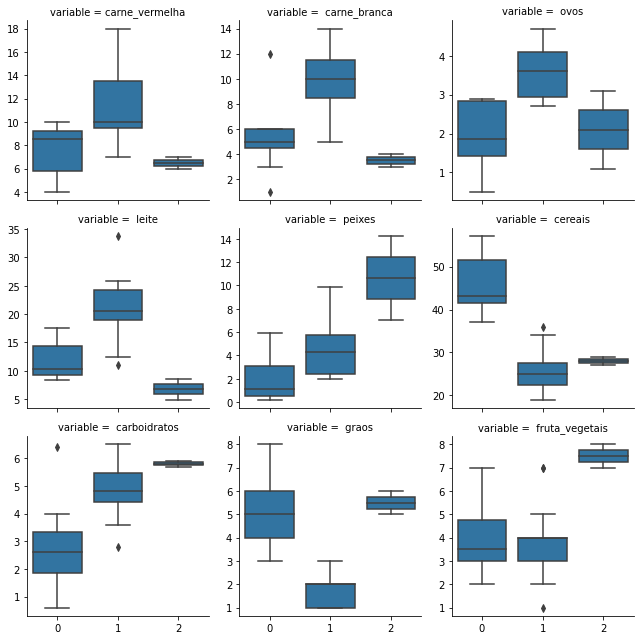

In [77]:
g = sns.FacetGrid(tabela_clusterk_z, col="variable", sharey=False, col_wrap=3)
g.map_dataframe(sns.boxplot, x="clusterk_z", y="value")